<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Linear Regression from Scratch (Gradient Descent)</h1>
Copyright Machine Learning Plus
</div>

### Import Packages

In [5]:
# Data manipulation
import numpy as np 
import pandas as pd

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt

import random

# Set options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### Load the boston data

In [6]:
df = pd.read_csv("./datasets/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
X = df.drop(columns=['MEDV'])
Y = df['MEDV'].values

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN


__Description__

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000 dollars
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.head(), '\n\n Y_Train: ', Y_train[:5])

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
435  11.16040   0.0  18.10   0.0  0.740  6.629  94.6  2.1247   24  666   
88    0.05660   0.0   3.41   0.0  0.489  7.007  86.3  3.4217    2  270   
365   4.55587   0.0  18.10   0.0  0.718  3.561  87.9  1.6132   24  666   
242   0.10290  30.0   4.93   0.0  0.428  6.358  52.9  7.0355    6  300   
461   3.69311   0.0  18.10   0.0  0.713  6.376  88.4  2.5671   24  666   

     PTRATIO       B  LSTAT  
435     20.2  109.85  23.27  
88      17.8  396.90   5.50  
365     20.2  354.70   7.12  
242     16.6  372.75  11.22  
461     20.2  391.43  14.65   

 Y_Train:  [13.4 23.6 27.5 22.2 17.7]


__Standardize X__

In [9]:
X_train_standardized = (X_train - X_train .mean()) / X_train.std()
X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()

In [35]:
X_train_standardized.fillna(0,inplace=True)
X_test_standardized.fillna(0,inplace=True)

### Define Functions

__Credits__: https://github.com/prateeksharma51/Multivariate-Linear-Regression-from-scratch-in-python/blob/master/Multivariate_Linear_Regression_from_Scratch.ipynb

__Error Function__

In [36]:
# Define the error function: MSE/2
def error_function(y_actual,y_predicted):
    error = 0
    for i in range(0,len(y_actual)):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
    return error/(2*len(y_actual))

In [37]:
error_function(Y_train, Y_train)

np.float64(0.0)

__Predict__

In [38]:
# Define the prediction function
def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i] + (w[j]*x[i][j] + w[-1])
    return y_pred

In [39]:
# Define the gradient descent optimization function
def gradient(y_actual,y_pred,x):
    # init betas (random)
    grad = np.zeros(x.shape[1])
    # update betas
    for j in range(0,len(y_actual)): # rows
        for i in range(x.shape[1]):  # columns
            grad[i] = grad[i] - ((y_actual[j] - y_pred[j])*x[j][i])
    return grad/len(y_actual)

In [40]:
X_test_standardized.shape

(167, 13)

In [46]:
# Define the update weights function
def weights(x_train,y_train,num_iterations,learning_rate):

    MSE_points = []
    no_of_rows = x_train.shape[0]
    no_of_columns = x_train.shape[1]

    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    new_x_train[:, 0:no_of_columns] = x_train

    w = np.zeros(no_of_columns)
    w = np.append(w,1)

    print("Running GRADIENT")
    
    for i in range(0,num_iterations):

        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        MSE_points.append(error)
        print("mean square error: ",error,"after",i,"th iteration")

        grad = gradient(y_train,y_pred,new_x_train)
        w = w - learning_rate*grad
        learning_rate = learning_rate/1.05  # Learning rate Decay 
    return w,MSE_points

In [47]:
# Define the regression test
def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row,column+1))
    # new_x_test = np.ones((row,column))
    new_x_test[:,0:column] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)

### Implement Linear Regression

In [48]:
num_iterations = 300
learning_rate = 0.1
w,MSE_points = weights(X_train_standardized, Y_train, num_iterations, learning_rate)
print("Final weights:", w)
Y_pred = regression_test(X_test_standardized, w)

print("Y_Pred: ", Y_pred[:10])
print("Error: ", error_function(Y_test, Y_pred))

Running GRADIENT
mean square error:  68.31750737463128 after 0 th iteration
mean square error:  30.83207672844855 after 1 th iteration
mean square error:  20.764883249890634 after 2 th iteration
mean square error:  17.67943110830404 after 3 th iteration
mean square error:  16.26774211550951 after 4 th iteration
mean square error:  15.327591646801405 after 5 th iteration
mean square error:  14.610481493463844 after 6 th iteration
mean square error:  14.043889272300092 after 7 th iteration
mean square error:  13.589308994300637 after 8 th iteration
mean square error:  13.22037629750742 after 9 th iteration
mean square error:  12.917896550154914 after 10 th iteration
mean square error:  12.667569399295175 after 11 th iteration
mean square error:  12.458586424662588 after 12 th iteration
mean square error:  12.28268550219057 after 13 th iteration
mean square error:  12.133488013270092 after 14 th iteration
mean square error:  12.00602433676556 after 15 th iteration
mean square error:  11.8

The error on training data was 10.64, whereas on test data it stands at $15.46$.

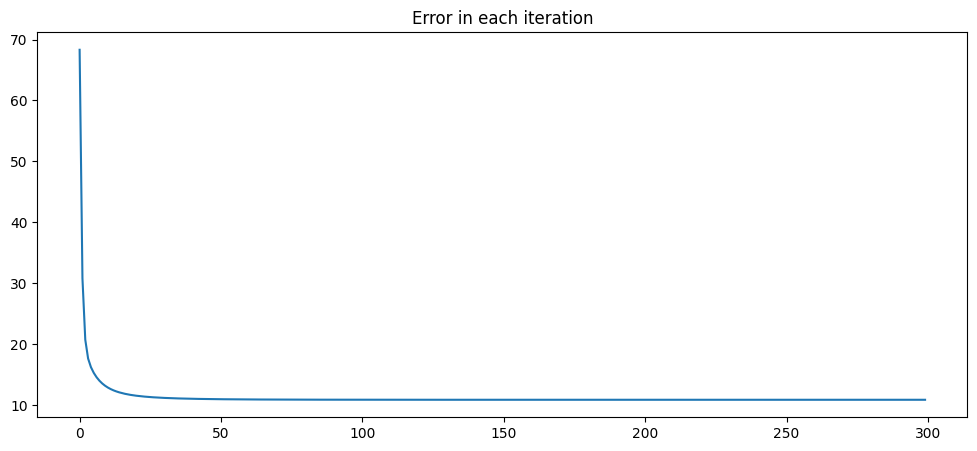

In [49]:
# Plot errors in each iteration
plt.figure(figsize=(12,5))
plt.plot(MSE_points)
plt.title("Error in each iteration")
plt.show()

__Predicted vs Actuals__

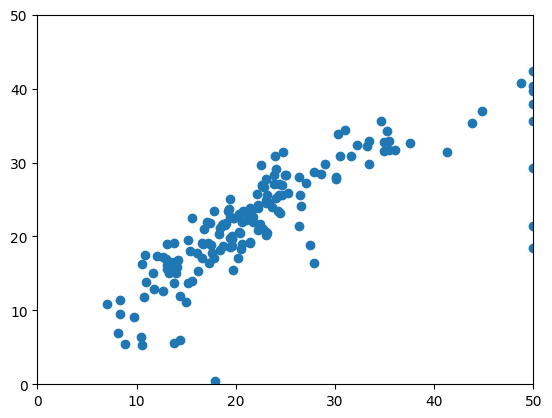

In [50]:
# Predicted vs Actuals
plt.scatter(Y_test, Y_pred)
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

### Implementing in scikit-learn

The values of the coefficients won't match with what we got, because, sklearn uses a [different solver](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn) ([scipy based OLS solver](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)).

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [52]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train_standardized, Y_train)

LinearRegression()

In [53]:
print(model.coef_, model.intercept_)

[-1.34873803  0.71021122 -0.65711559  0.2894663  -1.45676319  2.95214884
 -0.46427665 -2.7448335   2.66784468 -1.93373627 -2.10964596  1.07072803
 -2.97868479] 22.537168141592925


In [54]:
X_train_standardized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
435,0.897655,-0.488137,1.081792,-0.256098,1.631137,0.485317,0.959445,-0.822262,1.652890,1.549809,0.806886,-2.838763,1.509036
88,-0.407097,-0.488137,-1.128652,-0.256098,-0.551636,1.026561,0.663462,-0.183003,-0.870085,-0.801519,-0.303725,0.426805,-1.000675
365,0.121590,-0.488137,1.081792,-0.256098,1.439818,-3.907638,0.720519,-1.074367,1.652890,1.549809,0.806886,-0.053275,-0.771878
242,-0.401657,0.852257,-0.899933,-0.256098,-1.082110,0.097282,-0.527602,1.598147,-0.411362,-0.623388,-0.859031,0.152068,-0.192822
461,0.020211,-0.488137,1.081792,-0.256098,1.396337,0.123056,0.738349,-0.604214,1.652890,1.549809,0.806886,0.364577,0.291607


__Predict and check error on test dataset__

In [55]:
Y_pred2 = model.predict(X_test_standardized).round(2)
Y_pred2[:10]

array([33.57, 30.55, 27.58,  6.73, 34.24,  5.6 , 26.8 , 30.49, 26.59,
       22.14])

In [56]:
mean_squared_error(Y_pred2, Y_test)/2

np.float64(14.678751497005987)

__Check error on training dataset__

In [57]:
Y_trainpred = model.predict(X_train_standardized).round(2)
mean_squared_error(Y_trainpred, Y_train)/2

np.float64(10.14028215339233)

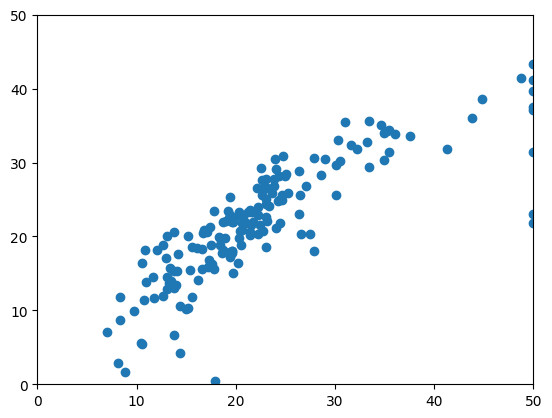

In [58]:
# Predicted vs Actuals
plt.scatter(Y_test, Y_pred2)
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()